In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

df = pd.read_csv("./covertype.csv")

## 1.Distribution of cover_type across different wilderness_type

In [5]:
# print(df.shape)
# print(df.info())
# grouped = df.groupby(['cover_type', 'wilderness_type']).size().unstack()
grouped = df.groupby(['wilderness_type', 'cover_type']).size().unstack()
grouped 

cover_type,Aspen,Cottonwood/Willow,Douglas-fir,Krummholz,Lodgepole Pine,Ponderosa Pine,Spruce/Fir
wilderness_type,,,,,,,
Cache la Poudre,NaN,2747.0,9741.0,NaN,3026.0,21454.0,NaN
Comanche Peak,5712.0,NaN,7626.0,13105.0,125093.0,14300.0,87528.0
Neota,NaN,NaN,NaN,2304.0,8985.0,NaN,18595.0
Rawah,3781.0,NaN,NaN,5101.0,146197.0,NaN,105717.0


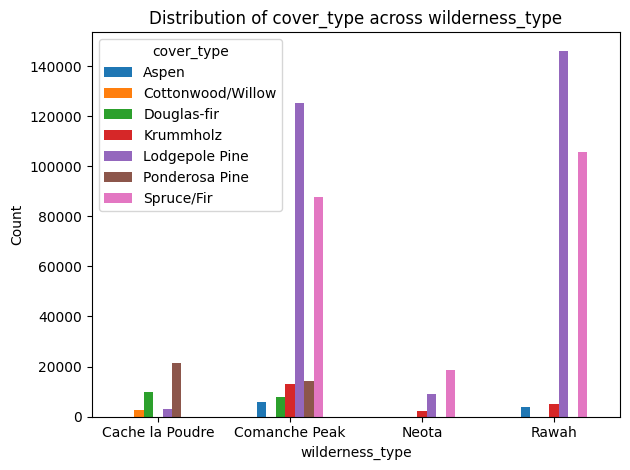

In [6]:
grouped.plot(kind='bar')

plt.title('Distribution of cover_type across wilderness_type')
plt.xlabel('wilderness_type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 2.Distribution of elevation on each cover type

(array([1, 2, 3, 4, 5, 6, 7]),
 [Text(1, 0, 'Aspen'),
  Text(2, 0, 'Cottonwood/Willow'),
  Text(3, 0, 'Douglas-fir'),
  Text(4, 0, 'Krummholz'),
  Text(5, 0, 'Lodgepole Pine'),
  Text(6, 0, 'Ponderosa Pine'),
  Text(7, 0, 'Spruce/Fir')])

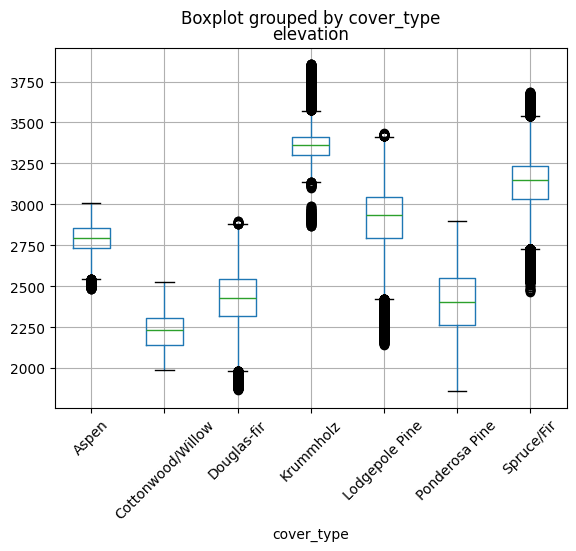

In [7]:
df.boxplot(column='elevation', by='cover_type', grid=True)
plt.xticks(rotation=45)

# 3.Number of data points on each climatic zone

In [8]:
grouped = df.groupby(['climatic_zone'])['index'].count().sort_values(ascending=True)
# print(grouped.index)
# print(grouped.value)
for index,value in enumerate(grouped.values):
    print(index)
    print(value)

0
284
1
602
2
8166
3
35947
4
40437
5
93593
6
401983


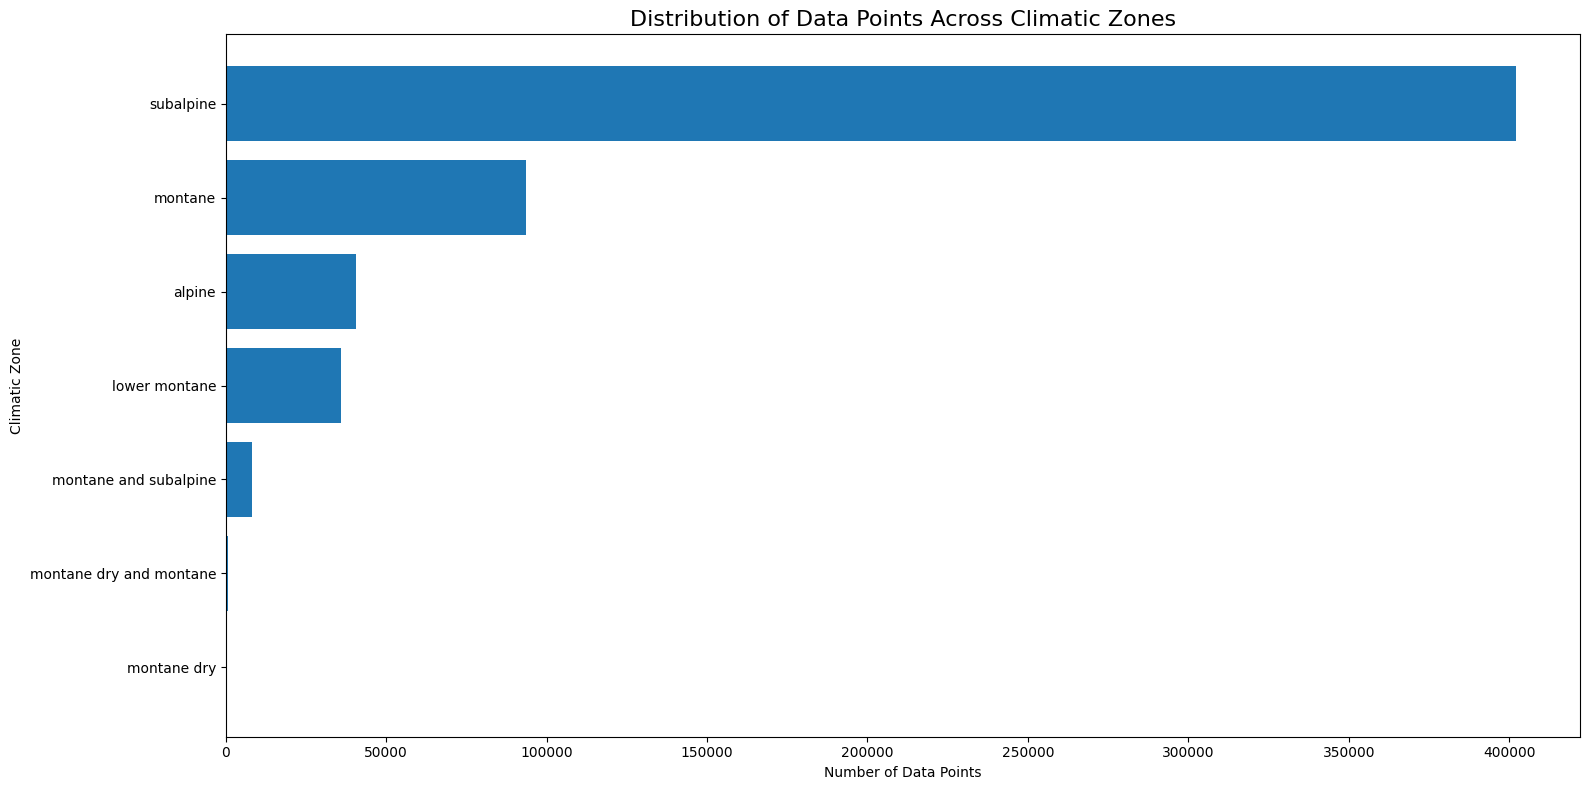

In [9]:
plt.figure(figsize=(16, 8))

# grouped index = Index(['montane dry', 'montane dry and montane', 'montane and subalpine','lower montane', 'alpine', 'montane', 'subalpine'], dtype='object', name='climatic_zone')
# grouped values = [   284    602   8166  35947  40437  93593 401983]


plt.barh(grouped.index, grouped.values)

# for index, value in enumerate(grouped.values):
    # plt.text(value, index, value, ha='left', va='center', fontsize=12)

plt.title('Distribution of Data Points Across Climatic Zones', fontsize=16)
plt.xlabel('Number of Data Points')
plt.ylabel('Climatic Zone')

plt.tight_layout()
plt.show()

# 4.Which cover type dominates subalpine climate?

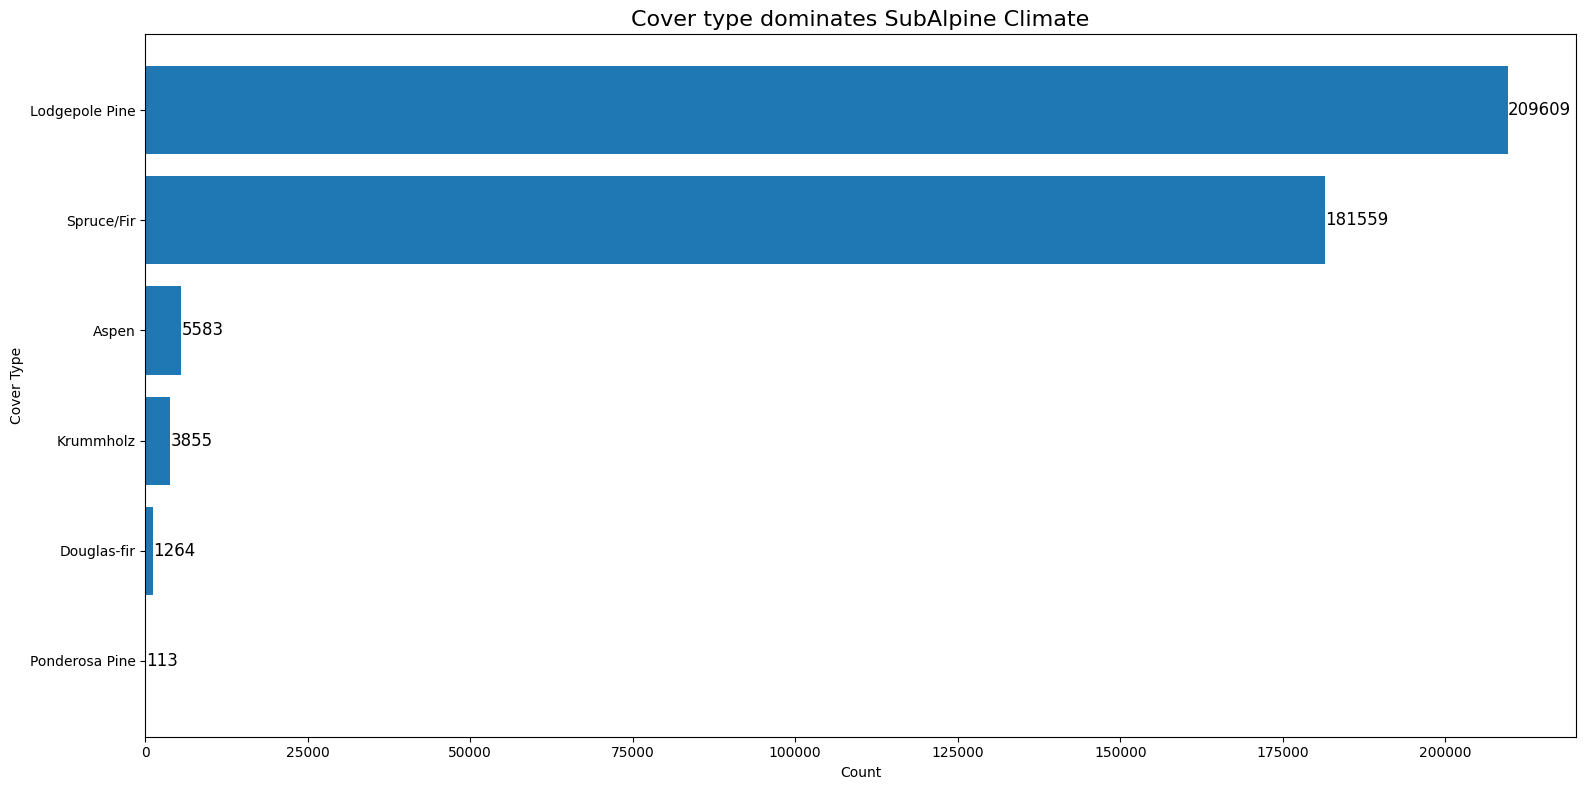

In [137]:

subAlpine = df[df["climatic_zone"] == "subalpine"]

covertType = subAlpine["cover_type"].value_counts().sort_values(ascending=True)

plt.figure(figsize=(16, 8))


plt.barh(covertType.index, covertType.values)

for index, value in enumerate(covertType.values):
    plt.text(value, index, value, ha='left', va='center', fontsize=12)

plt.title('Cover type dominates SubAlpine Climate', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Cover Type')

plt.tight_layout()
plt.show()

# 5.Which cover type is likely to be found near a body of water?

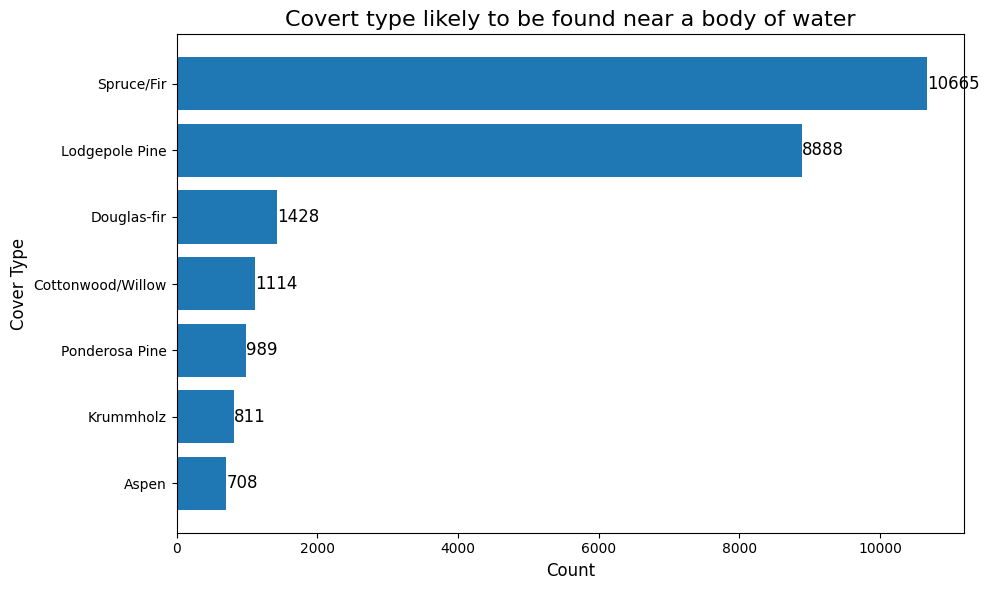

In [61]:
filter = df[(df["horizontal_distance_to_hydrology"] <= 25) & (df["vertical_distance_to_hydrology"] <= 25)][["horizontal_distance_to_hydrology", "vertical_distance_to_hydrology", "cover_type"]]

data = filter["cover_type"].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 6)) 

plt.barh(data.index, data.values)

for index, value in enumerate(data.values):
    plt.text(value, index, value, ha='left', va='center', fontsize=12)

plt.title('Covert type likely to be found near a body of water', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Cover Type', fontsize=12)

plt.tight_layout()
plt.show()

# 6.Which cover type is likely to be found in a shady area from 9 am to noon?

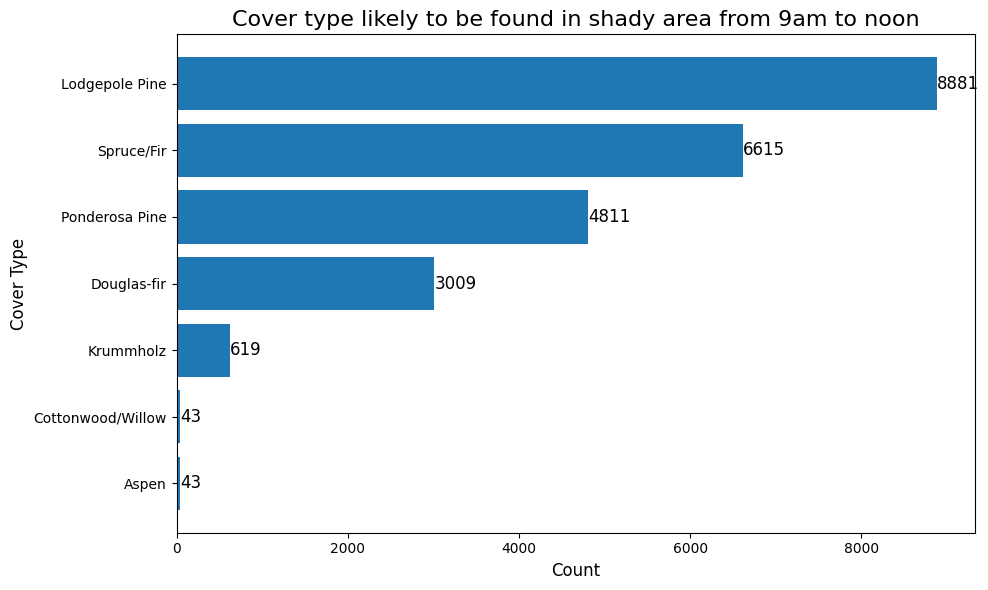

In [60]:
filter = df[(df["hillshade_9am"] <= 200) & (df["hillshade_noon"] <= 200)]


data = filter["cover_type"].value_counts().sort_values(ascending=True)

plt.figure(figsize=(10, 6)) 

plt.barh(data.index, data.values)

for index, value in enumerate(data.values):
    plt.text(value, index, value, ha='left', va='center', fontsize=12)

plt.title('Cover type likely to be found in shady area from 9am to noon', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Cover Type', fontsize=12)

plt.tight_layout()
plt.show()
